### Es cierto, una diferencia en los accidentes automovilisticos de Monterrey y las demás ciudades de México. 

Veamos si es cierto que hay un mayo número de accidentes en Monterrey que en otra ciudad.

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
from random import sample 

In [2]:
# cargamos los datos historicos
accidentes_mexico = pd.read_csv("../data/processed/atus_anual_1997_2019.csv", index_col=False)
accidentes_mexico.head()

entidad = accidentes_mexico.groupby("nom_entidad").id_entidad.count().reset_index().sort_values("id_entidad", ascending=False)


Text(0.5, 1.0, 'Conteos de Accidentes por años')

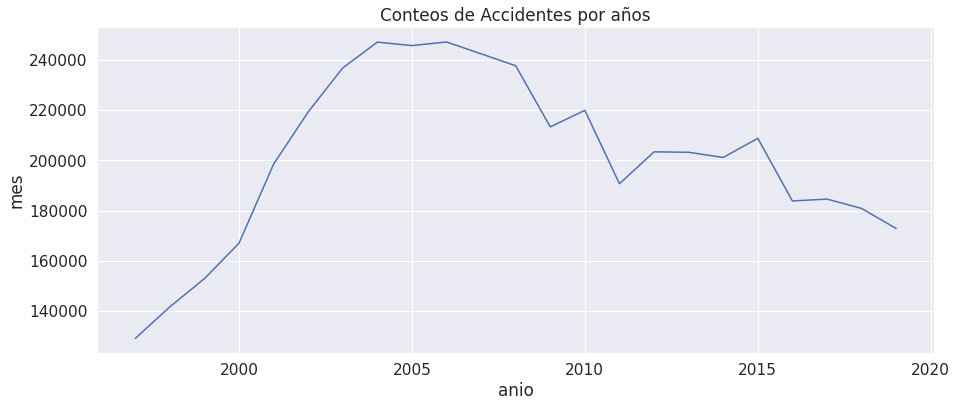

In [3]:
# graficamos el numero total de accidentes por años.
plt.rcParams['figure.figsize'] = (15, 6)
sns.lineplot(data=accidentes_mexico[accidentes_mexico.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:6])].groupby(["anio"], as_index=False).mes.count(),
             x="anio", y="mes")
plt.title("Conteos de Accidentes por años")

In [4]:
# accidentes_mexico["anio"].astype("str")+"-"+accidentes_mexico["mes"].astype("str")
# accidentes_mexico["fecha"] = accidentes_mexico[["anio", "mes","id_minuto"]].apply(lambda x: "{}-{}-{}".format(x[0], x[1], x[2]), axis=1)
# accidentes_mexico

Text(0.5, 1.0, 'Conteos de Accidentes por años')

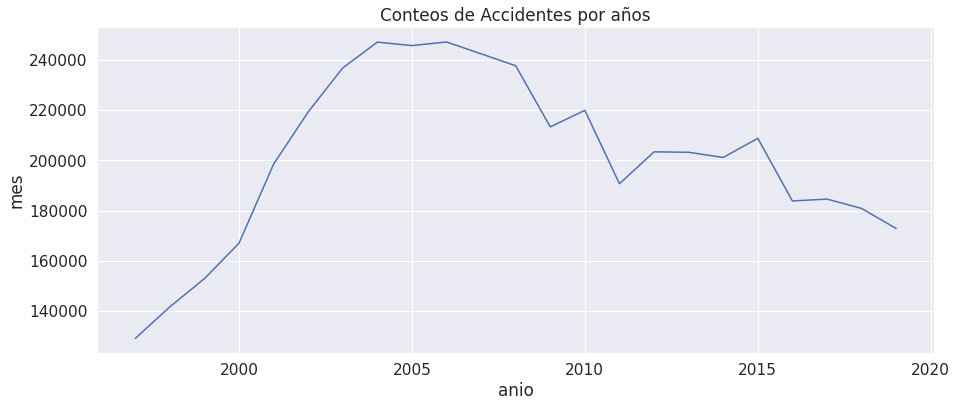

In [5]:
# graficamos el numero total de accidentes por años.
plt.rcParams['figure.figsize'] = (15, 6)
sns.lineplot(data=accidentes_mexico[accidentes_mexico.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:6])].groupby(["anio"], as_index=False).mes.count(),
             x="anio", y="mes")
plt.title("Conteos de Accidentes por años")

Text(0.5, 1.0, 'Número de accidentes por entidad.')

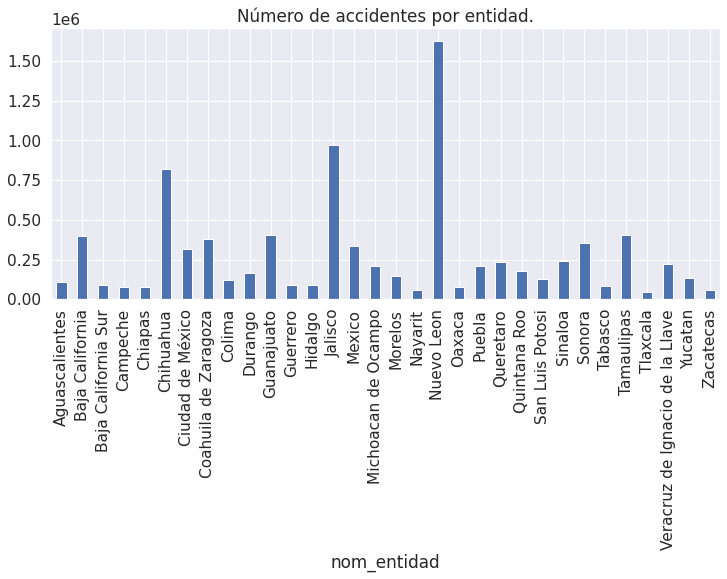

In [6]:
# comparamos los totales por años.
accidentes_mexico.groupby("nom_entidad").id_entidad.count().plot(kind='bar', figsize=(12, 5), rot=0)
plt.xticks(rotation=90)
plt.title("Número de accidentes por entidad.")

Observamos claramente que el estado Nuevo León es el que tiene más accidentes registrados en México. Pero, ¿siempre ha sido asi? Analicemos más a fondo este hecho.

Text(0.5, 1.0, 'Accidentes historicos por entidad federativa.')

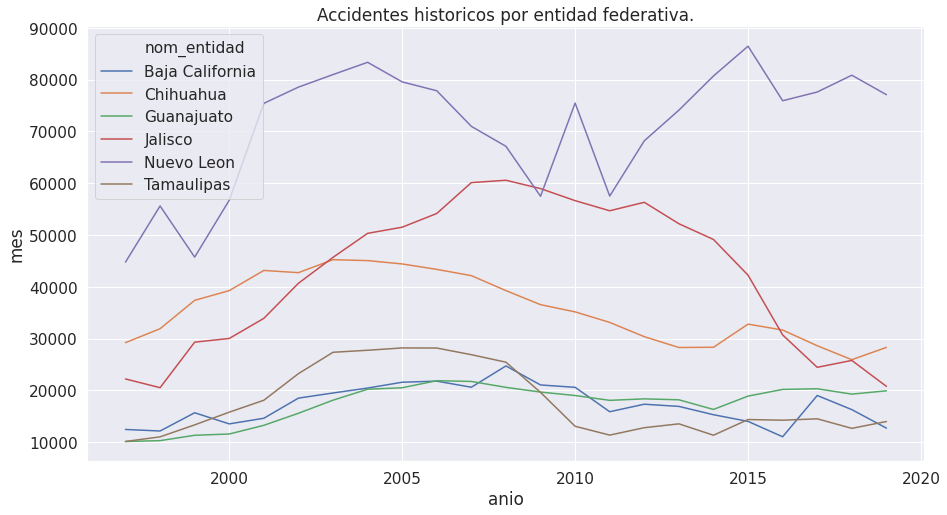

In [7]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.lineplot(data=accidentes_mexico[accidentes_mexico.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:6])].groupby(["nom_entidad","anio"], as_index=False).mes.count(),
             x="anio", y="mes", hue="nom_entidad")
plt.title("Accidentes historicos por entidad federativa.")

In [10]:
accidentes_mexico.head()

,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,tipaccid,causaacci,caparod,sexo,aliento,cinturon,id_edad,clasacc,nom_entidad,nom_municipio
0,1,1.0,2017,1,18,30,11.0,Miércoles,Colisión con vehículo automotor,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,Sólo daños,Aguascalientes,Aguascalientes
1,1,1.0,2017,1,1,50,9.0,Lunes,Colisión con motocicleta,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,No fatal,Aguascalientes,Aguascalientes
2,1,1.0,2017,1,8,30,12.0,Jueves,Colisión con objeto fijo,Conductor,Pavimentada,Hombre,No,Se ignora,22.0,No fatal,Aguascalientes,Aguascalientes
3,1,1.0,2017,1,17,40,9.0,Lunes,Colisión con motocicleta,Conductor,Pavimentada,Mujer,No,Se ignora,73.0,Sólo daños,Aguascalientes,Aguascalientes
4,1,1.0,2017,1,21,10,11.0,Miércoles,Colisión con objeto fijo,Conductor,Pavimentada,Hombre,No,Se ignora,33.0,No fatal,Aguascalientes,Aguascalientes


Claramente se observa que Monterrey simpre ha sido lider en el número total de accidentes automovilisticos. Realizemos una analisis más a fondo considerando lo que representan estos accidentes para el total de automoviles registrados. 

In [8]:
vehiculos_registrados = pd.read_csv("../data/processed/vehiculos_anual_1997_2019.csv", index_col=False)

In [9]:
vehiculos_registrados

,anio,id_entidad,id_municipio,auto_oficial,auto_publico,auto_particular,cam_pas_oficial,cam_pas_publico,cam_pas_particular,cyc_carga_oficial,cyc_carga_publico,cyc_carga_particular,moto_oficial,moto_de_alquiler,moto_particular,nom_entidad,nom_municipio
0,2019,1,1,466,4251,307832,9,2478,730,633,3545,99824,234,1,54280,Aguascalientes,Aguascalientes
1,2019,1,2,1,36,5504,0,5,18,3,21,5068,4,0,3681,Aguascalientes,Asientos
2,2019,1,3,2,157,11110,0,9,11,16,21,12212,10,0,1711,Aguascalientes,Calvillo
3,2019,1,4,1,16,2279,0,0,4,6,0,1708,0,0,1031,Aguascalientes,Cosío
4,2019,1,5,22,205,32039,0,80,96,38,192,14334,23,0,6672,Aguascalientes,Jesús María
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46295,2011,32,54,3,0,804,0,0,0,5,7,1720,0,0,226,Zacatecas,Villa Hidalgo
46296,2011,32,55,1,51,3346,0,18,19,7,48,6731,4,0,85,Zacatecas,Villanueva
46297,2011,32,56,518,284,44543,3,466,189,817,609,23471,77,7,2012,Zacatecas,Zacatecas
46298,2011,32,57,0,14,1268,0,20,3,2,3,2127,0,0,41,Zacatecas,Trancoso
